Required libraries for python for Fire Weather Machine Learning Model

In [7]:
# pip install shap
# pip install smt
# pip install xgboost
# pip install fiona
# pip install Shapely
# pip install xarray
# pip install wrf-python
# pip install netCDF4
# pip install Pydap
# pip install pyshp
# pip install geopandas

In [347]:
start_time = time.time()

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pyproj
import wrf
from matplotlib.cm import get_cmap
import sys
import netCDF4
import pydap
import cftime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import geopandas
from shapely.geometry import Polygon, Point, MultiPolygon
import shapefile
from datetime import datetime
from dateutil.tz import tzutc, tzlocal
import pytz
import xarray as xr
import wrf
import requests 
from html.parser import HTMLParser
import re
import os
import subprocess
import time
import datetime as dt
from dateutil.relativedelta import relativedelta
from bs4 import BeautifulSoup
import xarray as xr
import pandas as pd
import fiona
from shapely.geometry import shape, Point
from sklearn.metrics import classification_report
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import boto3
import glob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from smt.sampling_methods import LHS
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics
import xgboost as xgb
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve
import pickle
from datetime import datetime, date, timedelta
import calendar

get_daterange function: Creates Date Range function to create all days between start and end date

In [350]:
def get_daterange(start_date, end_date, step):
    while start_date <= end_date:
        yield start_date
        start_date += step

Seasonconversion function: For period of interest, which is 2019 to 2021, each day is assigned to a season

In [351]:
def seasonconversion(timestamp):
    if (timestamp > datetime(2018, 12, 21)) & (timestamp <= datetime(2019, 3, 20) ):
        season = 1
    elif (timestamp > datetime(2019, 3, 20))& (timestamp <= datetime(2019, 6, 21)):
        season = 2
    elif (timestamp > datetime(2019, 6, 21))& (timestamp <= datetime(2019, 9, 23) ):
        season = 3
    elif (timestamp > datetime(2019, 9, 23))& (timestamp <= datetime(2019, 12, 21)):
        season = 4  
    elif (timestamp > datetime(2019, 12, 21))& (timestamp <= datetime(2020, 3, 20)):
        season = 1
    elif (timestamp > datetime(2020, 3, 20))& (timestamp <= datetime(2020, 6, 20)):
        season = 2
    elif (timestamp > datetime(2020, 6, 20))& (timestamp <= datetime(2020, 9, 22) ):
        season = 3
    elif (timestamp > datetime(2020, 9, 22))& (timestamp <=  datetime(2020, 12, 21)):
        season = 4   
    elif (timestamp > datetime(2020, 12, 21))& (timestamp <= datetime(2021, 3, 20)):
        season = 1
    elif (timestamp > datetime(2021, 3, 20))& (timestamp <= datetime(2021, 6, 20)):
        season = 2
    elif (timestamp > datetime(2021, 6, 20))& (timestamp <= datetime(2021, 9, 22) ):
        season = 3
    elif (timestamp > datetime(2021, 9, 22))& (timestamp <= datetime(2021, 12, 21)):
        season = 4 
    else:
        season = None
    return season

p2f function: converts string percentage entry

timeconversion: converts MesoWest UTC String timestamp format to date time

windconversion: converts km/h to miles per hour

In [352]:
def p2f(x):
    return float(x.strip('%'))/100

def timeconversion(entry):
    utc_time = datetime.strptime(entry[:19],'%Y-%m-%dT%H:%M:%S')
    return pd.to_datetime(utc_time)

def windconversion(wind):
    return wind / 0.44704

Weather function: score rating provided by SDGE meteorology team where the function inputs are wind and dew point depression

dfm function: deadfuel moisture score provided by SDGE meteorology team with dead fuel moisture percentage as the function input

greeness score: greenes score provided by SDGE meteorology team with normalized difference vegatation index as the function input

In [353]:

def weather(df):
    wind = df[0] / 0.44704
    dew_point_depression =  df[1]
    weatherscore = 0
    if wind > 24:
        if dew_point_depression < 10:
            weatherscore = 0
        elif 10 < dew_point_depression <=  19:
            weatherscore = 1
        elif 20 < dew_point_depression <=  29:
            weatherscore = 3
        elif 30 < dew_point_depression <=  39:
            weatherscore = 4
        elif 40 < dew_point_depression <=  49:
            weatherscore = 5
        elif dew_point_depression >= 50:
            weatherscore = 6     
    elif 20 <= wind < 24:
        if dew_point_depression < 10:
            weatherscore = 0
        elif 10 < dew_point_depression <=  19:
            weatherscore = 1
        elif 20 < dew_point_depression <=  29:
            weatherscore = 3
        elif 30 < dew_point_depression <=  39:
            weatherscore = 3
        elif 40 < dew_point_depression <=  49:
            weatherscore = 4
        elif dew_point_depression >= 50:
            weatherscore = 5  
    elif 15 <= wind < 20:
        if dew_point_depression < 10:
            weatherscore = 0
        elif 10 <= dew_point_depression <=  19:
            weatherscore = 1
        elif 20 <= dew_point_depression <=  29:
            weatherscore = 2
        elif 30 <= dew_point_depression <=  39:
            weatherscore = 3
        elif 40 <= dew_point_depression <=  49:
            weatherscore = 3
        elif dew_point_depression >= 50:
            weatherscore = 4  
    elif 10 <= wind < 15:
        if dew_point_depression < 10:
            weatherscore = 0
        elif 10 <= dew_point_depression <=  19:
            weatherscore = 1
        elif 20 <= dew_point_depression <=  29:
            weatherscore = 2
        elif 30 <= dew_point_depression <=  39:
            weatherscore = 2
        elif 40 <= dew_point_depression <=  49:
            weatherscore = 3
        elif dew_point_depression >= 50:
            weatherscore = 3         
    elif 5 <= wind < 10:
        if dew_point_depression < 10:
            weatherscore = 0
        elif 10 <= dew_point_depression <=  19:
            weatherscore = 0
        elif 20 <= dew_point_depression <=  29:
            weatherscore = 1
        elif 30 <= dew_point_depression <=  39:
            weatherscore = 2
        elif 40 <= dew_point_depression <=  49:
            weatherscore = 2
        elif dew_point_depression >= 50:
            weatherscore = 3
    elif wind < 5:
        if dew_point_depression < 10:
            weatherscore = 0
        elif 10 <= dew_point_depression <=  19:
            weatherscore = 0
        elif 20 <= dew_point_depression <=  29:
            weatherscore = 1
        elif 30 <= dew_point_depression <=  39:
            weatherscore = 1
        elif 40 <= dew_point_depression <=  49:
            weatherscore = 2
        elif dew_point_depression >= 50:
            weatherscore = 3
    return weatherscore

def dfmscore(DFM):
#         DFMScore = 0
        if  DFM >= 10:
            DFMScore = 1
        elif DFM < 10 and DFM>= 6.5:
            DFMScore = 2
        elif DFM <6.5 and DFM>0:
            DFMScore = 3
        else:
            DFMScore = None
        return DFMScore
    
def greenness(NDVI):
#         DFMScore = 0
        if  NDVI >= 0.64:
            NDVIScore = 0
        elif NDVI < 0.64 and NDVI>= 0.59:
            NDVIScore = 1
        elif NDVI <0.59 and NDVI>=0.54:
            NDVIScore = 2
        elif NDVI <0.54 and NDVI>=0.49:
            NDVIScore = 3
        elif NDVI <0.49 and NDVI>=0.39:
            NDVIScore = 4
        elif NDVI <0.39 and NDVI>=0:
            NDVIScore = 5
        else:
            NDVIScore = None
        return NDVIScore

In [354]:

def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    actual, pred = np.array(y_true), np.array(y_pred)
    mape = np.mean(np.abs((actual - pred) / actual)) 
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MAPE:'  , round(mape,4)) 

Model Pipeline

<img src="DataPipeline.png" width=500 height=500 />

FPI Table: Dictionary table for storing each of the permutations for the 8 San Diego Districts and July 1st 2019 to February 8th 2021 period of performance

https://fpi.sdgeweather.com/

In [355]:
FPITable = pd.DataFrame([(x_, y_) for x_ in {'BC', 'CM', 'EA', 'ME', 'NC', 'NE', 'OC', 'RA'} for y_ in get_daterange(date(2019, 7, 1), date(2021, 2, 8), 
                                                                                   timedelta(days=1))])
FPITable.columns = ['District','Timestamp']
FPITable['Timestamp'] = pd.to_datetime(FPITable['Timestamp'])

Dataset 1:
MesoWest Fuel Attribute Steps, which requires synoptic data public token

In [356]:
# start_time = time.time()

public_token = ""

ME_stations = ['DENC1','CMNC1','POTC1','ANEC1','BAJC1']
RA_stations = ['JULC1','RCHC1','OGVC1','PAMC1','PIHC1','GOSC1']
EA_stations = ['ANEC1','BAJC1']
NE_stations = ['PAMC1','PZAC1','VLCC1','PSQC1','CTGC1']
OC_stations = ['CAPC1','ALLC1']
NC_stations = ['WIRC1']
BC_stations = ['MIGC1','BVDC1']
CM_stations = ['MIGC1','BVDC1']

SD_stations = {'ME_stations': ME_stations, 'RA_stations': RA_stations, 'EA_stations': EA_stations, 'NE_stations': NE_stations, 'OC_stations': OC_stations, 'NC_stations': NC_stations, 'BC_stations': BC_stations, 'CM_stations': CM_stations}

Features = pd.DataFrame(columns=['Timestamp','District','Station','date_time','fuel_temp_set_1','snow_interval_set_1','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','wind_gust_set_1','volt_set_1','solar_radiation_set_1','precip_accum_set_1','water_temp_set_1','peak_wind_speed_set_1','fuel_moisture_set_1','peak_wind_direction_set_1','dew_point_temperature_set_1d','wind_chill_set_1d','wind_cardinal_direction_set_1d','heat_index_set_1d'])
for i in SD_stations:
    for j in SD_stations[i]:
#         print(i,j)
        try:
            url = 'https://api.synopticdata.com/v2/stations/timeseries?stid='+j+'&obtimezone=local&start=201901010000&end=202102092359&vars=fuel_temp,snow_interval,air_temp,relative_humidity,wind_speed,wind_direction,wind_gust,volt,solar_radiation,precip_accum,water_temp,peak_wind_speed,fuel_moisture,peak_wind_direction,dew_point_temperature,wind_chill,wind_cardinal_direction,heat_index&token=' + public_token
            meso_west = requests.get(url).json()
            data = meso_west['STATION'][0]['OBSERVATIONS']
            df = pd.DataFrame(data, columns=['date_time','fuel_temp_set_1','snow_interval_set_1','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','wind_gust_set_1','volt_set_1','solar_radiation_set_1','precip_accum_set_1','water_temp_set_1','peak_wind_speed_set_1','fuel_moisture_set_1','peak_wind_direction_set_1','dew_point_temperature_set_1d','wind_chill_set_1d','wind_cardinal_direction_set_1d','heat_index_set_1d'])
            df['Timestamp'] = df['date_time'].apply(lambda x: str(x)[0:10])
            df['District'] = i
            df['Station'] = j
            Features = Features.append(df)
        except:
            print('Error')

MesoWestFuel = Features            
# print("--- %s seconds ---" % (time.time() - start_time))

In [357]:
MesoWestFuel['date_time'] = MesoWestFuel['date_time'].apply(lambda x: timeconversion(x))
MesoWestFuel['Timestamp'] = pd.to_datetime(MesoWestFuel['Timestamp'])
MesoWestFuel['District'] = MesoWestFuel['District'].apply(lambda x: x[:2])
MesoWestFuel['hour']  = MesoWestFuel['date_time'].apply(lambda x: x.hour)


MesoWestFuel Multiple Imputation Chained by Equation Step

In [358]:
MesoWestFuelTrainingImpute = np.array(MesoWestFuel[[
    'fuel_temp_set_1',
              'air_temp_set_1',
       'relative_humidity_set_1', 
    'wind_speed_set_1',
    'wind_gust_set_1',
    'precip_accum_set_1',
                                     'fuel_moisture_set_1',
              'peak_wind_speed_set_1','solar_radiation_set_1'
                                                   ]])


In [359]:

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan,max_iter=10, verbose=2,imputation_order='roman',random_state=42)

MesoWestFuelImputationDF = pd.DataFrame(imp.fit_transform(MesoWestFuelTrainingImpute))

MesoWestFuelImputationDF.columns = [
    'fuel_temp_set_1',
    'air_temp_set_1',
       'relative_humidity_set_1', 
    'wind_speed_set_1',
    'wind_gust_set_1',
    'precip_accum_set_1',
                                     'fuel_moisture_set_1',
'peak_wind_speed_set_1','solar_radiation_set_1'
                                   ]

MesoWestFueltemp = MesoWestFuel.reset_index()[['Timestamp','District','Station','date_time']].reset_index()
MesoWestFuelMICEDF = pd.merge(MesoWestFueltemp,MesoWestFuelImputationDF.reset_index(),how='left').drop(columns=['index'])
MesoWestFuelMICEDF['solar_radiation_set_1_flag'] = np.where(MesoWestFuelMICEDF['solar_radiation_set_1']>=400,1,0)

[IterativeImputer] Completing matrix with shape (459694, 9)
[IterativeImputer] Ending imputation round 1/10, elapsed time 1.05
[IterativeImputer] Change: 413.2511689695236, scaled tolerance: 1.137 
[IterativeImputer] Ending imputation round 2/10, elapsed time 2.12
[IterativeImputer] Change: 74.39127394473299, scaled tolerance: 1.137 
[IterativeImputer] Ending imputation round 3/10, elapsed time 3.24
[IterativeImputer] Change: 28.158139006111412, scaled tolerance: 1.137 
[IterativeImputer] Ending imputation round 4/10, elapsed time 4.29
[IterativeImputer] Change: 13.215431717146505, scaled tolerance: 1.137 
[IterativeImputer] Ending imputation round 5/10, elapsed time 5.34
[IterativeImputer] Change: 9.21193320631238, scaled tolerance: 1.137 
[IterativeImputer] Ending imputation round 6/10, elapsed time 6.39
[IterativeImputer] Change: 8.214453773432457, scaled tolerance: 1.137 
[IterativeImputer] Ending imputation round 7/10, elapsed time 7.44
[IterativeImputer] Change: 7.342463018324596

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Relevant Summary MesoWest Fuel Tables

In [360]:
FPITableFuel = FPITable
for column in ['air_temp_set_1','relative_humidity_set_1','wind_gust_set_1', 'solar_radiation_set_1',
       'precip_accum_set_1', 'peak_wind_speed_set_1',
       'fuel_temp_set_1','fuel_moisture_set_1']:
    if column == 'fuel_moisture_set_1':
        temp = MesoWestFuelMICEDF.groupby(['Timestamp','District'])[column].min().reset_index()
        temp['District'] = temp['District'].apply(lambda x: x[:2])
        temp['Timestamp'] = pd.to_datetime(temp['Timestamp'])
    else:
        temp = MesoWestFuelMICEDF.groupby(['Timestamp','District'])[column].max().reset_index()
        temp['District'] = temp['District'].apply(lambda x: x[:2])
        temp['Timestamp'] = pd.to_datetime(temp['Timestamp'])
    
    FPITableFuel = pd.merge(FPITableFuel,temp, how='left',left_on=['Timestamp','District'], right_on=['Timestamp','District'])

In [361]:
DistrictSolarRadiationMaxSum = pd.DataFrame(MesoWestFuelMICEDF.groupby(['Timestamp','District','Station']).sum()['solar_radiation_set_1'].groupby(['Timestamp','District']).max()).reset_index()
DistrictSolarRadiationMaxSum.columns = ['Timestamp', 'District', 'max_sum_solar_radiation_set_1']

DistrictSolarRadiationAvg = pd.DataFrame(MesoWestFuelMICEDF.groupby(['Timestamp','District']).mean()['solar_radiation_set_1']).reset_index()
DistrictSolarRadiationAvg.columns = ['Timestamp', 'District', 'avg_solar_radiation_set_1']

DistrictSolarRadiationElevated = pd.DataFrame(MesoWestFuelMICEDF.groupby(['Timestamp','District','Station']).sum()['solar_radiation_set_1_flag'].groupby(['Timestamp','District']).max()).reset_index()
DistrictSolarRadiationElevated.columns = ['Timestamp', 'District', 'elevated_solar_radiation_set_1']

In [362]:
FPITableFuel = pd.merge(FPITableFuel,DistrictSolarRadiationMaxSum, how='left',left_on=['Timestamp','District'], right_on=['Timestamp','District'])
FPITableFuel = pd.merge(FPITableFuel,DistrictSolarRadiationAvg, how='left',left_on=['Timestamp','District'], right_on=['Timestamp','District'])
FPITableFuel = pd.merge(FPITableFuel,DistrictSolarRadiationElevated , how='left',left_on=['Timestamp','District'], right_on=['Timestamp','District'])

MesoWestWind Load Requires Synoptic Data API Account

In [363]:
import requests

public_token = ""

ME_stations_WSDD = ['KCZZ']
RA_stations_WSDD = ['KCZZ']
EA_stations_WSDD = ['KRNM']
NE_stations_WSDD = ['KRNM']
OC_stations_WSDD = ['KNFG']
NC_stations_WSDD = ['KCRQ']
BC_stations_WSDD = ['KMYF']
CM_stations_WSDD = ['KSDM']

SD_stations_WSDD = {'ME_stations': ME_stations_WSDD, 'RA_stations': RA_stations_WSDD, 'EA_stations': EA_stations_WSDD, 'NE_stations': NE_stations_WSDD, 'OC_stations': OC_stations_WSDD, 'NC_stations': NC_stations_WSDD, 'BC_stations': BC_stations_WSDD, 'CM_stations': CM_stations_WSDD}

Features_WSDD = pd.DataFrame(columns=['Timestamp','District','Station','date_time','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','wind_gust_set_1','peak_wind_speed_set_1','peak_wind_direction_set_1','dew_point_temperature_set_1d','volt_set_1','wind_chill_set_1d','wind_cardinal_direction_set_1d','heat_index_set_1d','altimeter_set_1','dew_point_temperature_set_1','sea_level_pressure_set_1','weather_cond_code_set_1','cloud_layer_3_code_set_1','pressure_tendency_set_1','precip_accum_one_hour_set_1','precip_accum_three_hour_set_1','cloud_layer_1_code_set_1','cloud_layer_2_code_set_1','precip_accum_six_hour_set_1','precip_accum_24_hour_set_1','visibility_set_1','metar_remark_set_1','metar_set_1','air_temp_high_6_hour_set_1','air_temp_low_6_hour_set_1','ceiling_set_1','pressure_change_code_set_1','air_temp_high_24_hour_set_1','air_temp_low_24_hour_set_1','cloud_layer_1_set_1d','cloud_layer_3_set_1d','cloud_layer_2_set_1d','weather_summary_set_1d','pressure_set_1d','sea_level_pressure_set_1d','weather_condition_set_1d'])
for i in SD_stations_WSDD:
    for j in SD_stations_WSDD[i]:
        print(i,j)
        try:
            url_wsdd = 'https://api.synopticdata.com/v2/stations/timeseries?stid='+j+'&obtimezone=local&start=201901010000&end=202102092359&token=' + public_token
            meso_west_wsdd = requests.get(url_wsdd).json()
            data_wsdd = meso_west_wsdd['STATION'][0]['OBSERVATIONS']
            df_wsdd = pd.DataFrame(data_wsdd, columns=['date_time','air_temp_set_1','relative_humidity_set_1','wind_speed_set_1','wind_direction_set_1','wind_gust_set_1','peak_wind_speed_set_1','peak_wind_direction_set_1','dew_point_temperature_set_1d','volt_set_1','wind_chill_set_1d','wind_cardinal_direction_set_1d','heat_index_set_1d','altimeter_set_1','dew_point_temperature_set_1','sea_level_pressure_set_1','weather_cond_code_set_1','cloud_layer_3_code_set_1','pressure_tendency_set_1','precip_accum_one_hour_set_1','precip_accum_three_hour_set_1','cloud_layer_1_code_set_1','cloud_layer_2_code_set_1','precip_accum_six_hour_set_1','precip_accum_24_hour_set_1','visibility_set_1','metar_remark_set_1','metar_set_1','air_temp_high_6_hour_set_1','air_temp_low_6_hour_set_1','ceiling_set_1','pressure_change_code_set_1','air_temp_high_24_hour_set_1','air_temp_low_24_hour_set_1','cloud_layer_1_set_1d','cloud_layer_3_set_1d','cloud_layer_2_set_1d','weather_summary_set_1d','pressure_set_1d','sea_level_pressure_set_1d','weather_condition_set_1d'])
            df_wsdd['Timestamp'] = df_wsdd['date_time'].apply(lambda x: str(x)[0:10])
            df_wsdd['District'] = i
            df_wsdd['Station'] = j
            #df1 = df.groupby(['Date','Region','Station']).max().reset_index()
            Features_WSDD = Features_WSDD.append(df_wsdd)
        except:
            print('Error')

MesoWestWind = Features_WSDD 
MesoWestWind['District'] = MesoWestWind['District'].apply(lambda x : x[:2])
MesoWestWind['wind_speed_set_mph'] = MesoWestWind['wind_speed_set_1'].apply(lambda x: windconversion(x))

ME_stations KCZZ
RA_stations KCZZ
EA_stations KRNM
NE_stations KRNM
OC_stations KNFG
NC_stations KCRQ
BC_stations KMYF
CM_stations KSDM


MesoWest Wind Multiple Imputation by Chained Equations

In [364]:
MesoWestWindTrainingImpute = MesoWestWind.select_dtypes(include='float64')

lr = LinearRegression()
imp = IterativeImputer(estimator=lr,missing_values=np.nan,max_iter=10, verbose=2,imputation_order='roman',random_state=42)

MesoWestWindImputationDF = pd.DataFrame(imp.fit_transform(MesoWestWindTrainingImpute ))
MesoWestWindImputationDF.columns = MesoWestWindTrainingImpute.select_dtypes(include='float64').columns 
MesoWestWindtemp = MesoWestWind[['Timestamp','District','Station','date_time']]
MesoWestWindMICEDF = pd.merge(MesoWestWindtemp.reset_index(),MesoWestWindImputationDF.reset_index(),how='left').drop(columns=['index'])
MesoWestWindMICEDF['DewPointDepression'] = MesoWestWindMICEDF['air_temp_set_1']- MesoWestWindMICEDF['dew_point_temperature_set_1']

[IterativeImputer] Completing matrix with shape (1201487, 26)
[IterativeImputer] Ending imputation round 1/10, elapsed time 17.67
[IterativeImputer] Change: 1093444576.7594864, scaled tolerance: 102.94611 
[IterativeImputer] Ending imputation round 2/10, elapsed time 35.35
[IterativeImputer] Change: 626405.4792809052, scaled tolerance: 102.94611 
[IterativeImputer] Ending imputation round 3/10, elapsed time 53.11
[IterativeImputer] Change: 239509.82818673464, scaled tolerance: 102.94611 
[IterativeImputer] Ending imputation round 4/10, elapsed time 70.78
[IterativeImputer] Change: 1419.9347792974304, scaled tolerance: 102.94611 
[IterativeImputer] Ending imputation round 5/10, elapsed time 88.51
[IterativeImputer] Change: 5779.407949705942, scaled tolerance: 102.94611 
[IterativeImputer] Ending imputation round 6/10, elapsed time 106.20
[IterativeImputer] Change: 689.1740703117628, scaled tolerance: 102.94611 
[IterativeImputer] Ending imputation round 7/10, elapsed time 123.91
[Iterat

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


Relevant MesoWestWind Summary Tables

In [365]:
FPIWindTable = FPITable

FPITableWind = FPITable
for column in ['wind_speed_set_1','dew_point_temperature_set_1','dew_point_temperature_set_1d','DewPointDepression','wind_speed_set_mph']:
        temp = MesoWestWindMICEDF.groupby(['Timestamp','District'])[column].max().reset_index()
        temp['District'] = temp['District'].apply(lambda x: x[:2])
        temp['Timestamp'] = pd.to_datetime(temp['Timestamp'])
        
        FPITableWind = pd.merge(FPITableWind,temp, how='left',left_on=['Timestamp','District'], right_on=['Timestamp','District'])
# DewpointTable= pd.DataFrame(MesoWestWindMICEDF.groupby(['Timestamp','District'])[['DewPointDepression']].max()).reset_index()
# DewpointTable['Timestamp'] = pd.to_datetime(DewpointTable['Timestamp'])

# windspeed = pd.DataFrame(MesoWestWind.groupby(['Timestamp','District'])[['wind_speed_set_mph']].max()).reset_index()
# windspeed['Timestamp'] = pd.to_datetime(windspeed['Timestamp'])

# FPIWind = pd.merge(FPIWind,DewpointTable,'left')
# FPIWind = pd.merge(FPIWind,windspeed,'left')

Assume SDGE LFM Dataset is stored in S3 location

In [366]:
client = boto3.client('s3')
path = 's3://demo-primary-dp/LFM.csv'
LFM = pd.read_csv(path,parse_dates=['Date'])
LFM['ME'] = LFM['ME'].apply(lambda x: p2f(x))
LFM['RA'] = LFM['RA'].apply(lambda x: p2f(x))
LFM['EA'] = LFM['EA'].apply(lambda x: p2f(x))
LFM['NE'] = LFM['NE'].apply(lambda x: p2f(x))
LFM['OC'] = LFM['OC'].apply(lambda x: p2f(x))
LFM['NC'] = LFM['NC'].apply(lambda x: p2f(x))
LFM['BC'] = LFM['BC'].apply(lambda x: p2f(x))
LFM['CM'] = LFM['CM'].apply(lambda x: p2f(x))
LFMbyRegion = LFM.melt(id_vars=['Date'])
LFMbyRegion.columns = ['Timestamp','District','LFM']

NDVI Load

Assumes relevant NDVI csv files are in same folder location

In [367]:
file_list = glob.glob('/home/ec2-user/SageMaker/MODISTerraNDVI/*.csv')

District = {'Black_Mtn_Ranch': 'NE',
   'Campo': 'ME' ,
   'Camp_Pendleton__Wheelan_Lake' : 'OC',
   'Case_Springs' : 'OC',
   'Fallbrook__Ammo_Dump' : 'NE',
   'Guejito_North': 'NE',
   'Guejito_West': 'NE',
   'Hellhole_Canyon': 'NE',
   'Highland_Valley_Rd': 'RA',
   'Honey_Springs_Rd': 'ME',
   'Mesa_Grande': 'RA',
   'Mission_Trail': 'BC',
   'Ortega_Highway': 'OC',
   'Santa_Rosa_Plateau' : 'NE',
   'Santa_Ysabel_North' : 'RA',
   'Sycamore_Canyon' :    'EA',
   'Viejas' : 'ME', 
   'Warner_Springs' :   'RA',
   'Witch_Creek' : 'RA'}

DateTable = pd.DataFrame([(x_, y_) for x_ in set(District.keys()) for y_ in get_daterange(date(2014, 1, 1), date(2021, 5, 10), 
                                                                                   timedelta(days=1))])
DateTable.columns = ['Station','Timestamp']
DateTable['District'] =  DateTable['Station'].apply(lambda x: District.get(x))
DateTable['Timestamp'] = pd.to_datetime(DateTable['Timestamp'])

In [368]:
Ndvi= pd.DataFrame(columns=['Station','District','Timestamp','NDVI','NDVILinearInterpolation','NDVIQuadraticInterpolation'])
for file in file_list:
     
    district = District.get(file.split('/')[-1].replace('.csv',''))
    station = file.split('/')[-1].replace('.csv','')
    temp = pd.read_csv(file)
    temp['# timestamp'] = pd.to_datetime(temp['# timestamp'])
    temp.columns= ['Timestamp', 'NDVI']
    temp['District'] = district
    temp['Station'] = station
    print(station)
    NdviAllDates = pd.merge(DateTable.loc[DateTable['District']==district],temp,how='left',left_on=['District','Station','Timestamp'],right_on=['District','Station','Timestamp'])
    NdviAllDates['NDVILinearInterpolation'] = NdviAllDates.interpolate(method='linear',limit_direction='forward')['NDVI']
    NdviAllDates['NDVIQuadraticInterpolation'] = NdviAllDates.interpolate(method='quadratic',limit_direction='forward')['NDVI']
    Ndvi = Ndvi.append(NdviAllDates)
NdviTable = pd.DataFrame(Ndvi.groupby(['District','Timestamp']).max())['NDVILinearInterpolation'].reset_index()
NdviTable.columns = ['District', 'Timestamp', 'NDVI']

Santa_Ysabel_North
Camp_Pendleton__Wheelan_Lake
Case_Springs
Guejito_West
Highland_Valley_Rd
Fallbrook__Ammo_Dump
Hellhole_Canyon
Viejas
Santa_Rosa_Plateau
Guejito_North
Sycamore_Canyon
Black_Mtn_Ranch
Campo
Mesa_Grande
Mission_Trails
Ortega_Highway
Warner_Springs
Honey_Springs_Rd
Witch_Creek


In [369]:
%%time
import pandas as pd
import boto3
client = boto3.client('s3')
path = 's3://demo-primary-dp/ForecastFPI.csv'
FPIPosted = pd.read_csv(path,parse_dates=['Date'])
FPIPostedUnpivot = FPIPosted.melt(id_vars=['Date'],var_name='District',value_name='FPIPosted')
FPIPostedUnpivot.columns = ['Timestamp','District','FPIPosted']
FPIPostedUnpivot['Timestamp'] = pd.to_datetime(FPIPostedUnpivot['Timestamp'])

CPU times: user 177 ms, sys: 4.22 ms, total: 182 ms
Wall time: 243 ms


Combine Summary Tables

In [530]:
FPITable1 = pd.merge(FPITable,FPITableFuel)
FPITable2 = pd.merge(FPITable1,FPITableWind)
FPITable3 = pd.merge(FPITable2,NdviTable)
FPITable4 = pd.merge(FPITable3,LFMbyRegion)
FPITable5 = pd.merge(FPITable4,FPIPostedUnpivot)
FPITable5['GreennessScore']= FPITable5['NDVI'].apply(lambda x: greenness(x))
FPITable5['WxScore'] = FPITable5[['wind_speed_set_mph','DewPointDepression']].apply(lambda x: weather(x), axis=1)
FPITable5['FuelComponentScore'] = FPITable5['fuel_moisture_set_1'].apply(lambda x: dfmscore(x)) /  FPITable5['LFM']
FPITable5['FPICalculated'] = FPITable5['GreennessScore'] + FPITable5['FuelComponentScore'] + FPITable5['WxScore']
FPITable6  = FPITable5
FPITable6['FPIResidual'] = FPITable5['FPICalculated']-FPITable5['FPIPosted']
FPITable6['PreviousFPIPosted'] = FPITable6.FPIPosted.shift(1)
FPITable6['PreviousFPICalculated'] = FPITable6.FPICalculated.shift(1)
FPITable6['Season'] = FPITable6['Timestamp'].apply(lambda x: seasonconversion(x))
FPITable6['DistrictCategory'] = FPITable6['District'].astype('category').cat.codes
FPITable6['Month'] = FPITable6['Timestamp'].apply(lambda x: x.month)
FPITable7 = FPITable6.dropna()

In [531]:
# feature selection process of backward elimination is not needed

In [532]:
X = FPITable7[['air_temp_set_1', 'relative_humidity_set_1', 'wind_gust_set_1',
       'solar_radiation_set_1', 'precip_accum_set_1', 'peak_wind_speed_set_1',
       'fuel_temp_set_1', 'fuel_moisture_set_1',
       'max_sum_solar_radiation_set_1', 'avg_solar_radiation_set_1',
       'elevated_solar_radiation_set_1', 'wind_speed_set_1',
       'dew_point_temperature_set_1', 'dew_point_temperature_set_1d', 'NDVI',
       'LFM', 
#                'PreviousFPICalculated', 
               'Season', 'DistrictCategory', 'Month']]
y = FPITable7['FPIPosted']

X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.2, stratify = FPITable7['Season'])
X_test , X_validation , y_test , y_validation = train_test_split(X_test,y_test,test_size=0.2,stratify=X_test['Season'])

Random Forest Latin HyperCube

In [373]:
# # n_estimators, max_features , max_depth , min_samples_split , min_samples_leaf 
# parameterlimits = np.array([[100, 300.0], [1.0, 12.0],[1.0,400],[2,10],[1,10]])
# sampling = LHS(xlimits=parameterlimits)
# parameterhypercube = np.array(sampling(150),dtype='int')

# LatinMAE = []

# for n_estimators, max_features , max_depth , min_samples_split , min_samples_leaf in parameterhypercube:
#     random_forest = RandomForestRegressor(n_estimators = n_estimators , max_features = max_features , max_depth = max_depth , min_samples_split= min_samples_split , min_samples_leaf = min_samples_leaf , random_state=44)
#     random_forest.fit(X_train, y_train)
#     y_validation_pred = random_forest.predict(X_validation)
#     LatinMAE.append((n_estimators, max_features , max_depth , min_samples_split , min_samples_leaf, mean_absolute_error(y_validation,y_validation_pred)))
    
# ParametersLatinMAE = pd.DataFrame(LatinMAE)
# ParametersLatinMAE.columns = ['n_estimators', 'max_features' , 'max_depth' , 'min_samples_split' , 'min_samples_leaf' ,'MeanAbsoluteError']

# print(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()])

# rf_best = RandomForestRegressor(n_estimators=int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['n_estimators'])
#                                       , max_features=int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['max_features'])
#                       , max_depth=  int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['max_depth'])
#                       , min_samples_split = int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['min_samples_split'])
#                       , min_samples_leaf = int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['min_samples_leaf'])
#                     , random_state=44
#                 )

# rf_best.fit(pd.concat([X_train,X_validation]),pd.concat([y_train,y_validation]))
# y_test_pred = rf_best.predict(X_test)
# regression_results(y_test,y_test_pred)

In [374]:
# import matplotlib.pyplot as plt
# features = X_train.columns
# importances = rf_best.feature_importances_
# indices = np.argsort(importances)

# # customized number 
# num_features = 15

# # plt.figure(figsize=(100,100))
# plt.title('Feature Importances')

# # only plot the customized number of features
# plt.barh(range(num_features), importances[indices[-num_features:]], color='b', align='center')
# plt.yticks(range(num_features), [features[i] for i in indices[-num_features:]])
# plt.xlabel('Relative Importance')
# plt.show()

Random Forest Random Search

In [375]:
n_estimators = [ int(x) for x in np.linspace(start=10,stop=200, num=10)] 
max_features = [ int(x) for x in np.linspace(start=1,stop=12, num=3)] 
max_depth = [ int(x) for x in np.linspace(start=10,stop=1000, num=10)] 
min_samples_split = [2,5,10,20]
min_samples_leaf = [1,2,4,6]
bootstrap = [True , False]

from sklearn.model_selection import RandomizedSearchCV
random_grid = {'n_estimators' : n_estimators ,
               'max_features' : max_features ,
               'max_depth' : max_depth ,
               'min_samples_split' : min_samples_split ,
               'min_samples_leaf' :  min_samples_leaf ,
               'bootstrap' : bootstrap
}

from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state=42)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1
                              , scoring='neg_mean_absolute_percentage_error')
rf_random.fit( pd.concat([X_train, X_validation]) , pd.concat([y_train, y_validation]) )
y_test_pred = rf_random.predict(X_test)
print(regression_results(y_test,y_test_pred))
print('best parameters', rf_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
explained_variance:  0.9546
mean_squared_log_error:  0.0065
r2:  0.9545
MAE:  0.4998
MSE:  0.5049
RMSE:  0.7106
MAPE: 0.0626
None
best parameters {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 6, 'max_depth': 890, 'bootstrap': False}


Manual Option

In [376]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
# nestimators = [ int(x) for x in np.linspace(start=10,stop=200, num=10)] 
# max_depth = [ int(x) for x in np.linspace(start=10,stop=1000, num=10)] 
# max_features = [ int(x) for x in np.linspace(start=1,stop=11, num=3)] 

# RfMAE = []
# from sklearn.metrics import mean_absolute_error
# for i in max_depth:
#     for j in nestimators:
#         for k in max_features:
#             random_forest = RandomForestRegressor(max_depth= i, n_estimators = j , max_features = k , random_state=44)
#             random_forest.fit(X_train, y_train)
#             y_validation_pred = random_forest.predict(X_validation)
#             RfMAE.append((i,j,k,mean_absolute_error(y_validation , y_validation_pred)))

# ParametersRfMAE = pd.DataFrame(RfMAE)
# ParametersRfMAE.columns = ['max_depth','n_estimators', 'max_features','MeanAbsoluteError']

# print(ParametersRfMAE.iloc[ParametersRfMAE['MeanAbsoluteError'].idxmin()])

# rf_best = RandomForestRegressor(n_estimators=int(ParametersRfMAE.iloc[ParametersRfMAE['MeanAbsoluteError'].idxmin()]['n_estimators'])
#                                       , max_features=int(ParametersRfMAE.iloc[ParametersRfMAE['MeanAbsoluteError'].idxmin()]['max_features'])
#                       , max_depth=  int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['max_depth'])
# #                       , min_samples_split = int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['min_samples_split'])
# #                       , min_samples_leaf = int(ParametersLatinMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()]['min_samples_leaf'])
#                     , random_state=44
#                 )

# rf_best.fit(pd.concat([X_train,X_validation]),pd.concat([y_train,y_validation]))
# y_test_pred = rf_best.predict(X_test)
# regression_results(y_test,y_test_pred)

XGBoost

Latin Hypercube - Option 1

In [377]:
# parameterlimits = np.array([[0.03,0.07],[4,10],[1,4],[0.5,1],[100,500]])
# sampling = LHS(xlimits=parameterlimits)
# parameterRFhypercube = np.array(sampling(100),dtype='int')

In [378]:
# RFLatinMAE = []

# for eta , max_depth , min_child_weight , sub_sample, n_estimators in parameterRFhypercube:
#     xgb_boost = xgb.XGBRegressor(eta = eta , max_depth = max_depth ,
#                                  min_child_weight= min_child_weight, 
#                                  n_estimators=n_estimators , random_state=44)
#     xgb_boost.fit(X_train, y_train)
#     y_validation_pred = xgb_boost.predict(X_validation)
#     RFLatinMAE.append((eta, max_depth, min_child_weight, sub_sample, n_estimators, mean_absolute_error(y_validation,y_validation_pred)))
    
# ParametersLatinRFMAE = pd.DataFrame(RFLatinMAE)
# ParametersLatinRFMAE.columns = ['eta' , 'max_depth' , 'min_child_weight' , 'sub_sample' , 'n_estimators','MeanAbsoluteError']


# print(ParametersLatinRFMAE.iloc[ParametersLatinMAE['MeanAbsoluteError'].idxmin()])

# rf_best = xgb.XGBRegressor( 
    
    
    
#     eta=  int(ParametersLatinRFMAE.iloc[ParametersLatinRFMAE['MeanAbsoluteError'].idxmin()]['eta'])
#                       , max_depth = int(ParametersLatinRFMAE.iloc[ParametersLatinRFMAE['MeanAbsoluteError'].idxmin()]['max_depth']), min_child_weight = int(ParametersLatinRFMAE.iloc[ParametersLatinRFMAE['MeanAbsoluteError'].idxmin()]['min_child_weight']), sub_sample = int(ParametersLatinRFMAE.iloc[ParametersLatinRFMAE['MeanAbsoluteError'].idxmin()]['sub_sample'])
#                     , n_estimators = int(ParametersLatinRFMAE.iloc[ParametersLatinRFMAE['MeanAbsoluteError'].idxmin()]['n_estimators']), random_state=44)


# rf_best.fit(pd.concat([X_train,X_validation]),pd.concat([y_train,y_validation]))
# y_test_pred = rf_best.predict(X_test)
# regression_results(y_test,y_test_pred)

Random Search

In [379]:

# from sklearn.model_selection import RandomizedSearchCV
# random_grid = {'nthread':[4], #when use hyperthread, xgboost may become slower
#               'objective':['reg:linear'],
#               'learning_rate': [.03, 0.05, .07], #so called `eta` value
#               'max_depth': [5, 6, 7],
#               'min_child_weight': [4],
#               'silent': [1],
#               'subsample': [0.7],
#               'colsample_bytree': [0.7],
#               'n_estimators': [500]}

# # random_grid = {
# #         'min_child_weight': [1, 5, 10],
# #         'gamma': [0.5, 1, 1.5, 2, 5],
# # #         'subsample': [0.6, 0.8, 1.0],
# #         'colsample_bytree': [0.6, 0.8, 1.0],
# #         'max_depth': [3, 4, 5]
# # }

# from sklearn.model_selection import RandomizedSearchCV

# xgb_random = RandomizedSearchCV(estimator = xgb.XGBRegressor(), param_distributions = random_grid, n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1
#                                ,
#                                 scoring='neg_mean_absolute_percentage_error'
#                                )
# xgb_random.fit( pd.concat([X_train, X_validation]) , pd.concat([y_train, y_validation]) )
# y_test_pred = xgb_random.predict(X_test)
# print(regression_results(y_test,y_test_pred))
# print('best parameters', xgb_random.best_params_)

Manual Search

In [380]:
# max_depth =  [5, 6, 7]
# # eta =  np.array([.01]) #so called `eta` value


# XGMAE = []
# from sklearn.metrics import mean_absolute_error
# for i in max_depth:
# #     for j in eta:
#             xgb_boost = xgb.XGBRegressor(max_depth = i , random_state=44)
#             xgb_boost.fit(X_train, y_train)
#             y_validation_pred = xgb_boost.predict(X_validation)
#             print(mean_absolute_error(y_validation , y_validation_pred))
# #             XGMAE.append(i,mean_absolute_error(y_validation , y_validation_pred))

# # ParametersXGMAE = pd.DataFrame(XGMAE)
# # ParametersXGMAE.columns = ['max_depth','MeanAbsoluteError']
# # print(ParametersXGMAE)

High Potential Fire Risk Events

In [381]:

SD_Fires = geopandas.read_file("historical-fires.geojson")
SD_Fires = SD_Fires.reset_index()
SD_Fires['perimeter_timestamp'] = pd.to_datetime(SD_Fires['perimeter_timestamp'])
SD_Fires_Date = SD_Fires['perimeter_timestamp']
SD_Fires.drop(labels=['perimeter_timestamp'], axis=1,inplace = True)
SD_Fires.insert(0, 'Date', SD_Fires_Date)
SD_Fires_19 = SD_Fires[(SD_Fires['Date']>='2019-07-01')].sort_values(by=['index'])

In [382]:
# disticts from wrf file
d_shp = fiona.open('SDGE_ElecDist_dslv_wgs84.shp')
districts = [x for x in d_shp]
for d in districts:
    print(d['properties']['SUB_DIST'])

Beach Cities
Eastern
Metro
Mountain Empire
North Coast
North East
Orange County
Ramona


In [383]:
# obtain all of the geo coordinates for each of the 7 regions (SDGE_ElecDist_dslv_wgs84.shp)

district_shapes = {}
for d in districts:
    district_shapes[d['properties']['SUB_DIST']] = {
        'shape' : shape(d['geometry']),
        'points' : []
    }

# what is the outage nc file

geo_f = 'inv_outage_d03.nc'
geo_ds = xr.open_dataset(geo_f)

#%%time # takes about a minute

# for each x and y point in the spatial grid, determine which district the point belongs to

for y in range(geo_ds.dims['south_north']):
    
    for x in range(geo_ds.dims['west_east']):

        # convert x, y to lat, lon
        lat, lon = wrf.xy_to_ll(geo_ds._file_obj.ds, x, y)
        lat = lat.values.tolist()
        lon = lon.values.tolist()
        pt = Point(lon,lat)
        #print(x, y, pt)
        
        # see if this lat, lon is within a district
        for name in district_shapes:
            
            if district_shapes[name]['shape'].contains(pt):
                #print(x, y, pt, name)
                district_shapes[name]['points'].append((x,y))
                
GeoFH_Regions = {}
for d in districts:
    print(d['properties']['SUB_DIST'])
    #for g in SD_Fires_19['geometry']:
    for index, row in SD_Fires.iterrows():
        if shape(d['geometry']).intersects(shape(row['geometry'])):
            if d['properties']['SUB_DIST'] == 'Beach Cities':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('BC')
                else:
                    GeoFH_Regions[index] = ['BC']
            if d['properties']['SUB_DIST'] == 'Eastern':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('EA')
                else:
                    GeoFH_Regions[index] = ['EA']
            if d['properties']['SUB_DIST'] == 'Metro':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('CM')
                else:
                    GeoFH_Regions[index] = ['CM']
            if d['properties']['SUB_DIST'] == 'Mountain Empire':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('ME')
                else:
                    GeoFH_Regions[index] = ['ME']
            if d['properties']['SUB_DIST'] == 'North Coast':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('NC')
                else:
                    GeoFH_Regions[index] = ['NC']
            if d['properties']['SUB_DIST'] == 'North East':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('NE')
                else:
                    GeoFH_Regions[index] = ['NE']
            if d['properties']['SUB_DIST'] == 'Orange County':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('OC')
                else:
                    GeoFH_Regions[index] = ['OC']
            if d['properties']['SUB_DIST'] == 'Ramona':
                if index in GeoFH_Regions:
                    GeoFH_Regions[index].append('RA')
                else:
                    GeoFH_Regions[index] = ['RA']
            print("True")
        else:
            print("False")
GeoFH_Regions

Beach Cities
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fal

{338: ['BC', 'EA'],
 590: ['BC', 'EA', 'ME', 'NE', 'RA'],
 7: ['EA'],
 9: ['EA'],
 14: ['EA'],
 15: ['EA', 'ME', 'NC', 'NE', 'RA'],
 16: ['EA', 'CM', 'ME'],
 19: ['EA', 'CM', 'ME'],
 23: ['EA', 'ME', 'NE', 'RA'],
 24: ['EA', 'CM', 'ME'],
 25: ['EA', 'CM', 'ME'],
 27: ['EA', 'ME'],
 28: ['EA', 'ME', 'NC', 'NE', 'RA'],
 29: ['EA', 'ME', 'NC', 'NE', 'RA'],
 35: ['EA', 'ME', 'NC', 'NE', 'RA'],
 36: ['EA', 'ME', 'NC', 'NE', 'RA'],
 43: ['EA', 'CM', 'ME'],
 45: ['EA', 'ME', 'NC', 'NE', 'RA'],
 47: ['EA', 'ME', 'NC', 'NE', 'RA'],
 48: ['EA'],
 54: ['EA'],
 58: ['EA'],
 60: ['EA'],
 61: ['EA'],
 63: ['EA'],
 64: ['EA'],
 66: ['EA'],
 67: ['EA'],
 69: ['EA'],
 70: ['EA'],
 71: ['EA'],
 74: ['EA'],
 75: ['EA'],
 81: ['EA'],
 137: ['EA'],
 163: ['EA'],
 166: ['EA'],
 168: ['EA'],
 169: ['EA'],
 188: ['EA'],
 191: ['EA'],
 197: ['EA', 'ME'],
 198: ['EA', 'ME'],
 200: ['EA', 'ME'],
 204: ['EA', 'ME'],
 205: ['EA', 'ME'],
 206: ['EA', 'ME'],
 218: ['EA'],
 221: ['EA', 'ME', 'NC', 'NE', 'RA'],
 222: 

In [384]:
# basically joining on index
SD_Fires['Regions'] = ''
for index, row in SD_Fires.iterrows():
    for key in GeoFH_Regions:
        if key == index:
            print(key,index)
            row['Regions'] = GeoFH_Regions[key]
            SD_Fires['Regions'][index] = row['Regions']
            print(SD_Fires.loc[index,'Regions'])
        else:
            next
            
            
client = boto3.client('s3')
path = 's3://demo-primary-dp/FiresIgnitions/Fire History.csv'
SDGEFires = pd.read_csv(path)
SDGEFires['Date'] = pd.to_datetime(SDGEFires['Date'])


RegionPivot = SD_Fires.Regions.apply(pd.Series).reset_index().melt(id_vars=['index']).dropna()
SDFires = pd.merge(SD_Fires,RegionPivot,'left',left_on = ['index'],right_on=['index']).drop(columns=['Regions','variable'])
SDGEFires['Type'] = 'SDGE'

temp = SDFires[['Date','value','acres']]
temp.columns = ['Date', 'District', 'acres']

FireHistory = SDGEFires[['Date','District','acres','Type']].append(temp)
FireHistory.columns = ['Timestamp','District','Acres','Type']

1 1
['ME']
2 2
['ME']
3 3
['ME']
4 4
['ME']
5 5
['ME']
6 6
['RA']
7 7
['EA']
8 8
['RA']
9 9
['EA']
10 10
['CM']
11 11
['RA']
12 12
['ME']
13 13
['RA']
14 14
['EA']
15 15
['EA', 'ME', 'NC', 'NE', 'RA']
16 16
['EA', 'CM', 'ME']
17 17
['NE', 'RA']
18 18
['ME']
19 19
['EA', 'CM', 'ME']
20 20
['NE', 'RA']
21 21
['RA']
22 22
['NE']
23 23
['EA', 'ME', 'NE', 'RA']
24 24
['EA', 'CM', 'ME']
25 25
['EA', 'CM', 'ME']
26 26
['NE', 'RA']
27 27
['EA', 'ME']
28 28
['EA', 'ME', 'NC', 'NE', 'RA']
29 29
['EA', 'ME', 'NC', 'NE', 'RA']
30 30
['NE', 'RA']
31 31
['ME']
33 33
['NE']
34 34
['NE', 'RA']
35 35
['EA', 'ME', 'NC', 'NE', 'RA']
36 36
['EA', 'ME', 'NC', 'NE', 'RA']
37 37
['RA']
38 38
['ME']
39 39
['RA']
40 40
['ME']
41 41
['ME']
42 42
['NE']
43 43
['EA', 'CM', 'ME']
44 44
['ME']
45 45
['EA', 'ME', 'NC', 'NE', 'RA']
46 46
['NE', 'RA']
47 47
['EA', 'ME', 'NC', 'NE', 'RA']
48 48
['EA']
49 49
['NE', 'RA']
50 50
['RA']
51 51
['RA']
52 52
['ME']
53 53
['ME']
54 54
['EA']
57 57
['CM']
58 58
['EA']
60 60
['E

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



['EA']
417 417
['EA']
418 418
['RA']
419 419
['EA']
420 420
['EA']
421 421
['EA']
422 422
['EA']
423 423
['EA']
424 424
['ME']
427 427
['EA']
428 428
['NE']
429 429
['RA']
430 430
['EA']
431 431
['CM']
432 432
['CM']
433 433
['ME']
434 434
['ME']
436 436
['EA']
437 437
['EA']
438 438
['EA']
439 439
['EA']
440 440
['NE']
441 441
['NE']
442 442
['CM']
443 443
['RA']
444 444
['EA']
445 445
['RA']
446 446
['RA']
447 447
['RA']
448 448
['NE']
449 449
['RA']
450 450
['EA', 'ME']
451 451
['RA']
452 452
['NE']
453 453
['EA']
454 454
['EA', 'RA']
455 455
['NE', 'RA']
457 457
['ME']
458 458
['ME']
459 459
['RA']
460 460
['RA']
461 461
['ME']
462 462
['EA']
463 463
['ME']
464 464
['RA']
465 465
['CM']
466 466
['EA']
467 467
['ME']
468 468
['RA']
469 469
['NE']
470 470
['RA']
471 471
['RA']
472 472
['EA']
473 473
['RA']
474 474
['EA']
475 475
['RA']
476 476
['NE']
478 478
['CM']
479 479
['ME']
480 480
['RA']
483 483
['ME']
484 484
['RA']
485 485
['NE']
486 486
['ME']
487 487
['EA', 'CM']
491 491


In [385]:
FireHistory['Week'] = FireHistory['Timestamp'] - pd.to_timedelta(FireHistory['Timestamp'].dt.dayofweek, unit='d')
# FireHistory  = FireHistory.groupby(['Week','District']).max(['Acres']).reset_index()
# FireHistory= FireHistory[FireHistory['Week']!=' 2020-08-31']

In [386]:
# Focusing on September 7th 2020 Fire Event
FireHistory = FireHistory[(FireHistory['Timestamp'] == '2020-09-07')]

In [387]:
FireHistory 

Timestamp District         Acres Type       Week
777 2020-09-07       EA  17345.024452  NaN 2020-09-07
778 2020-09-07       ME  17345.024452  NaN 2020-09-07

In [388]:
FPIFeaturesFireHistory= pd.merge(FPITable7,FireHistory,how='left',left_on=['Timestamp','District'], right_on=['Timestamp','District'])

In [389]:
X =  FPIFeaturesFireHistory[['air_temp_set_1', 'relative_humidity_set_1', 'wind_gust_set_1',
       'solar_radiation_set_1', 'precip_accum_set_1', 'peak_wind_speed_set_1',
       'fuel_temp_set_1', 'fuel_moisture_set_1',
       'max_sum_solar_radiation_set_1', 'avg_solar_radiation_set_1',
       'elevated_solar_radiation_set_1', 'wind_speed_set_1',
       'dew_point_temperature_set_1', 'dew_point_temperature_set_1d', 'NDVI',
       'LFM', 
#                'PreviousFPICalculated', 
               'Season', 'DistrictCategory', 'Month']]

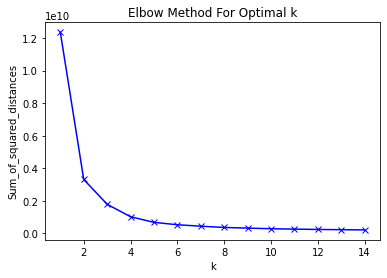

In [390]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k,random_state=42)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [391]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=4,random_state=42)
model.fit(X)

KMeans(n_clusters=4, random_state=42)

In [392]:
FPIFeaturesFireHistory['Cluster'] = model.labels_

In [393]:
FPIFeaturesFireHistory[FPIFeaturesFireHistory['Acres'].notnull()]

District  Timestamp  air_temp_set_1  relative_humidity_set_1  \
1495       ME 2020-09-07          37.778                     78.0   
1979       EA 2020-09-07          36.667                     71.0   

      wind_gust_set_1  solar_radiation_set_1  precip_accum_set_1  \
1495            8.493                  931.0             653.034   
1979            8.493                  786.0             547.370   

      peak_wind_speed_set_1  fuel_temp_set_1  fuel_moisture_set_1  ...  \
1495                  8.493           46.111                  3.1  ...   
1979                  8.493           45.000                  3.4  ...   

      FPIResidual  PreviousFPIPosted  PreviousFPICalculated  Season  \
1495    -5.384615               15.0               8.615385       3   
1979    -3.384615               14.0              10.615385       3   

      DistrictCategory  Month         Acres  Type       Week  Cluster  
1495                 1      9  17345.024452   NaN 2020-09-07        0  
1979                 0      9  17345.024452   NaN 2020-09-07        0  

[2 rows x 35 columns]

In [561]:
FPIFeaturesFireHistory['FireRisk'] = np.where(FPIFeaturesFireHistory['Cluster']==0,1,0)

In [562]:

X_train = FPIFeaturesFireHistory[FPIFeaturesFireHistory['Timestamp']<'2020-06-30'][[
  'air_temp_set_1', 'relative_humidity_set_1', 'wind_gust_set_1',
       'solar_radiation_set_1', 'precip_accum_set_1', 'peak_wind_speed_set_1',
       'fuel_temp_set_1', 'fuel_moisture_set_1',
#        'max_sum_solar_radiation_set_1', 'avg_solar_radiation_set_1',
       'elevated_solar_radiation_set_1', 
    'wind_speed_set_1',
       'dew_point_temperature_set_1', 'dew_point_temperature_set_1d',
    'NDVI',
       'LFM', 
 
               'Season', 'DistrictCategory', 'Month'  
           ]]
y_train = FPIFeaturesFireHistory[FPIFeaturesFireHistory['Timestamp']<'2020-06-30']['FireRisk']

X_test = FPIFeaturesFireHistory[FPIFeaturesFireHistory['Timestamp']>'2020-06-30'][[
  'air_temp_set_1', 'relative_humidity_set_1', 'wind_gust_set_1',
       'solar_radiation_set_1', 'precip_accum_set_1', 'peak_wind_speed_set_1',
       'fuel_temp_set_1', 'fuel_moisture_set_1',
#        'max_sum_solar_radiation_set_1', 'avg_solar_radiation_set_1',
       'elevated_solar_radiation_set_1', 
    'wind_speed_set_1',
       'dew_point_temperature_set_1', 'dew_point_temperature_set_1d',
    'NDVI',
       'LFM', 

               'Season', 'DistrictCategory', 'Month'  
                                                                               ]]
y_test = FPIFeaturesFireHistory[FPIFeaturesFireHistory['Timestamp']>'2020-06-30']['FireRisk']
y_test1 = FPIFeaturesFireHistory[FPIFeaturesFireHistory['Timestamp']>'2020-06-30'][['FireRisk','Timestamp','District']]

In [564]:
# import plotly.graph_objects as go
# import plotly.express as px
# from plotly.subplots import make_subplots

# indexes = FPIFeaturesFireHistory[(FPIFeaturesFireHistory['Timestamp']>'2020-06-30')&(FPIFeaturesFireHistory['District']=='ME')].index

# # Create figure with secondary y-axis
# fig = make_subplots(specs=[[{"secondary_y": True}]])

# fig.add_trace(
#     go.Scatter(x=y_test1[y_test1['District']=='ME']['Timestamp'], y=y_test1[y_test1['District']=='ME']['FireRisk'],mode='markers', name="Actual"),
#     secondary_y=False,
# )

# fig.add_trace(
#     go.Scatter(x=y_test1[y_test1['District']=='ME']['Timestamp'], y=y_test1[y_test1['District']=='ME']['y_pred'],mode='markers', name="Prediction"),
#     secondary_y=False,
# )




# fig.update_traces(opacity=0.5)



# fig.update_layout(
#     yaxis = dict(
#         tickmode = 'array',
#         tickvals = [0, 1],
# #         ticktext = ['Zero', 'One']
#     )
# )

# fig.update_layout(
#     title="Fire Risk Prediction versus Actual over Time for Mountain Empire",
#     xaxis_title="Date",
#     yaxis_title="Fire Risk",
#     legend_title="Fire Risk Type",
#     font=dict(
#         family="Semibold",
#         size=18,
#         color="Grey")
#     )

# fig.show()

In [ ]:
1

In [565]:
np.sum(FPIFeaturesFireHistory1.iloc[y_test.index]['FPIPostedRisk'] == y_test) / y_test.shape[0]

NameError: name 'FPIFeaturesFireHistory1' is not defined

In [566]:
FPIFeaturesFireHistory

District  Timestamp  air_temp_set_1  relative_humidity_set_1  \
0          NE 2019-07-02          31.670                    100.0   
1          NE 2019-07-03          28.890                    100.0   
2          NE 2019-07-04          28.890                    100.0   
3          NE 2019-07-05          29.440                    100.0   
4          NE 2019-07-06          29.440                    100.0   
...       ...        ...             ...                      ...   
2717       OC 2021-02-04          17.778                     99.0   
2718       OC 2021-02-05          22.222                     97.0   
2719       OC 2021-02-06          25.000                     94.0   
2720       OC 2021-02-07          23.333                     98.0   
2721       OC 2021-02-08          16.111                     99.0   

      wind_gust_set_1  solar_radiation_set_1  precip_accum_set_1  \
0               9.840                 1066.0            1112.012   
1              10.280                 1026.0            1112.012   
2               9.840                 1069.0            1112.012   
3               8.940                 1059.0            1112.012   
4               9.840                 1063.0            1112.012   
...               ...                    ...                 ...   
2717            6.703                  680.0             104.394   
2718            7.151                  691.0             104.394   
2719            5.813                  708.0             104.394   
2720            7.151                  714.0             104.394   
2721            7.151                  711.0             104.648   

      peak_wind_speed_set_1  fuel_temp_set_1  fuel_moisture_set_1  ...  \
0                     9.840           45.000                  4.7  ...   
1                    10.280           41.110                  4.8  ...   
2                     9.840           41.670                  5.2  ...   
3                     8.940           42.780                  5.7  ...   
4                     9.840           43.330                  6.0  ...   
...                     ...              ...                  ...  ...   
2717                  6.703           25.000                  8.6  ...   
2718                  7.151           29.444                  7.0  ...   
2719                  5.813           32.222                  5.7  ...   
2720                  7.151           31.667                  5.9  ...   
2721                  7.151           23.889                  9.6  ...   

      PreviousFPIPosted  PreviousFPICalculated  Season  DistrictCategory  \
0                  11.0               4.846154       3                 2   
1                  11.0               4.846154       3                 2   
2                  12.0               4.846154       3                 2   
3                  12.0               3.846154       3                 2   
4                  12.0               4.846154       3                 2   
...                 ...                    ...     ...               ...   
2717                7.0               8.857143       1                 3   
2718                8.0               8.857143       1                 3   
2719                9.0               9.857143       1                 3   
2720                9.0               9.285714       1                 3   
2721                8.0               6.285714       1                 3   

      Month  Acres  Type  Week  Cluster  FireRisk  
0         7    NaN   NaN   NaT        2         0  
1         7    NaN   NaN   NaT        2         0  
2         7    NaN   NaN   NaT        2         0  
3         7    NaN   NaN   NaT        2         0  
4         7    NaN   NaN   NaT        2         0  
...     ...    ...   ...   ...      ...       ...  
2717      2    NaN   NaN   NaT        3         0  
2718      2    NaN   NaN   NaT        3         0  
2719      2    NaN   NaN   NaT        3         0  
2720      2    NaN   NaN   NaT       

In [420]:
# import plotly.express as px
# # Evaluating model performance at various thresholds
# df = pd.DataFrame({
#     'False Positive Rate': fpr,
#     'True Positive Rate': tpr
# }, index=thresholds)
# df.index.name = "Thresholds"
# df.columns.name = "Rate"

# fig_thresh = px.line(
#     df, title='TPR and FPR at every threshold',
#     width=700, height=500
# )

# # fig_thresh.update_yaxes(scaleanchor="x", scaleratio=1)
# # fig_thresh.update_xaxes(range=[0, 1], constrain='domain')
# fig_thresh.show()

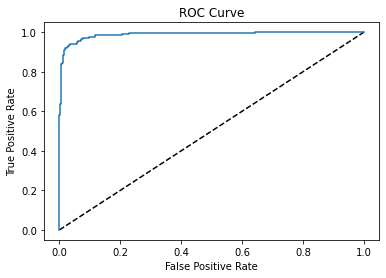

In [421]:
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [422]:

print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       654
           1       0.90      0.96      0.93       241

    accuracy                           0.96       895
   macro avg       0.94      0.96      0.95       895
weighted avg       0.96      0.96      0.96       895



[19:03:27] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



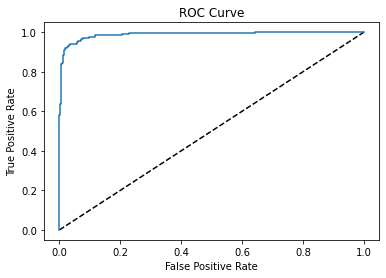

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       654
           1       0.90      0.96      0.93       241

    accuracy                           0.96       895
   macro avg       0.94      0.96      0.95       895
weighted avg       0.96      0.96      0.96       895



In [550]:
xgb_class = xgb.XGBClassifier(max_depth=5)
xgb_class.fit(X_train, y_train)
y_pred = xgb_class.predict(X_test)
y_pred_prob = xgb_class.predict_proba(X_test)[:,1]
fpr , tpr , thresholds = roc_curve(y_test, y_pred_prob)

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(classification_report(y_pred,y_test))

In [397]:
totaltime = time.time() - start_time
print(totaltime)

642.1359097957611


In [568]:
FPIFeaturesFireHistory['FPIPostedRisk'] = np.where(FPIFeaturesFireHistory['FPIPosted']>13.3,1,0)

In [569]:
np.sum(FPIFeaturesFireHistory.iloc[y_test.index]['FPIPostedRisk'] == y_test) / y_test.shape[0]

0.7821229050279329

In [398]:
totaltime / 60

10.702265163262686

In [538]:
%time
decision_tree_regressor_pkl_filename = 'random_forest_regressor.pkl'
# Open the file to save as pkl file
decision_tree_regressor_model_pkl = open(decision_tree_regressor_pkl_filename, 'wb')
pickle.dump(rf_random, decision_tree_regressor_model_pkl)

xg_boost_regressor_pkl_filename = 'xg_boost_regressor.pkl'
# Open the file to save as pkl file
xg_boost_regressor_model_pkl = open(xg_boost_regressor_pkl_filename, 'wb')
pickle.dump(xgb_random, xg_boost_regressor_model_pkl)

xg_boost_class_pkl_filename = 'xg_boost_class.pkl'
# Open the file to save as pkl file
xg_boost_class_model_pkl = open(xg_boost_class_pkl_filename, 'wb')
pickle.dump(xgb_class, xg_boost_class_model_pkl)

CPU times: user 3 µs, sys: 2 µs, total: 5 µs
Wall time: 11.2 µs


In [555]:
xgb_class = xgb.XGBClassifier(max_depth=5)
xgb_class.fit(X_train, y_train)

[19:06:19] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/xgboost/sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
xg_boost_class

In [551]:
xg_boost_class_pkl_filename = 'xg_boost_class.pkl'
# Open the file to save as pkl file
xg_boost_class_model_pkl = open(xg_boost_class_pkl_filename, 'wb')
pickle.dump(xgb_class, xg_boost_class_model_pkl)